### First, we import the relevant libraries for performing the tasks we require

In [2]:
!pip install nequip

### Library for training machine learning potentials
import nequip

### Library for data storage
import pickle

### Library of mathematical functions
import numpy as np

### Library for plotting results
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 4.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.4 MB/s eta 0:00:00


/opt/anaconda3/lib/python3.12/site-packages/nequip/__init__.py:20: UserWarning: !! PyTorch version 2.3.1 found. Upstream issues in PyTorch versions 1.13.* and 2.* have been seen to cause unusual performance degredations on some CUDA systems that become worse over time; see https://github.com/mir-group/nequip/discussions/311. The best tested PyTorch version to use with CUDA devices is 1.11; while using other versions if you observe this problem, an unexpected lack of this problem, or other strange behavior, please post in the linked GitHub issue.
  warnings.warn(


### Next, we can read the data from the pickle file

In [3]:
### This opens the data file as the variable 'f' and reads the contents into each variable atoms, energies...
with open("atoms_energies_forces_stresses.pkl","rb") as f:
    structures, energies, forces, stresses = pickle.load(f)

### The variables atoms, energies, forces and stresses are lists which means that it is just a list of things, such as numbers, matricies or even python objects. Lets take a look

In [4]:
print("The first energy =", energies[0], "eV")
print()
print("The first force =", forces[0], "in units of eV/angstrom")
print()
print("The first stress=", stresses[0],"in units of kilobars")

The first energy = -97.4161547274548 eV

The first force = [[ 5.69909872e-02 -1.76185541e-03 -2.23835194e-02]
 [-5.69916568e-02 -1.76180701e-03  2.23841691e-02]
 [-5.69907920e-02  1.76206263e-03 -2.23834784e-02]
 [ 5.69923567e-02  1.76119312e-03  2.23841928e-02]
 [-5.69917025e-02  1.76141469e-03  2.23837663e-02]
 [ 5.69925485e-02  1.76140587e-03 -2.23842864e-02]
 [ 5.69906477e-02 -1.76215856e-03  2.23832952e-02]
 [-5.69934419e-02 -1.76046307e-03 -2.23846119e-02]
 [ 1.17626792e-08  2.33927185e-07  6.50083823e-03]
 [-5.51220743e-09 -2.86324382e-07 -6.50026872e-03]
 [ 1.85004604e-08 -9.71142470e-08 -6.50115062e-03]
 [-8.62011135e-08  1.41895065e-07  6.50059329e-03]] in units of eV/angstrom

The first stress= [[-1.51929838e+02  8.33082365e-06  1.13971169e-05]
 [ 8.21279775e-06 -1.48890261e+02 -1.12902036e-05]
 [ 1.12940485e-05 -1.13501092e-05 -1.52194604e+02]] in units of kilobars


In [5]:
### Lets also take a look at the 25th structure in our list of structures 
### Remember! Python indicies start at 0, so the first structure in our list is actually structures[0]. This means
### structures[24] is actually the 25th structure
from ase.visualize import view
view(structures[24])

### You should be able to right click and drag in the pop-up to see the atoms and the unit cell. 
### If you go to the toolbar in the pop-up and click view->repeat and increase the numbers and go back to the pop-up,
### You will see how the crystal structure gets formed by simply duplicating the unit cell to the left, right, up, down, etc.

<Popen: returncode: None args: ['/opt/anaconda3/bin/python', '-m', 'ase', 'g...>

### If you count the number of atoms in the unit cell, you should notice that there are 12. You should also notice that there are 12 vectors for the forces that we printed before, like $$[[x_1, y_1, z_1], [x_2, y_2, z_2]...[x_{12}, y_{12}, z_{12}]]$$ These are the forces on each atom in the unit cell in this configuration. You can see that the forces are small, but not zero. This means the atoms want to move and are not stable in this configuration



### Each structure at index i (such as structures[i]) have corresponding forces at index i (forces[i]) as well as energies and stresses. We won't worry about stresses for now and focus on the energies and forces <br>  Lets visualize the distribution of energies now

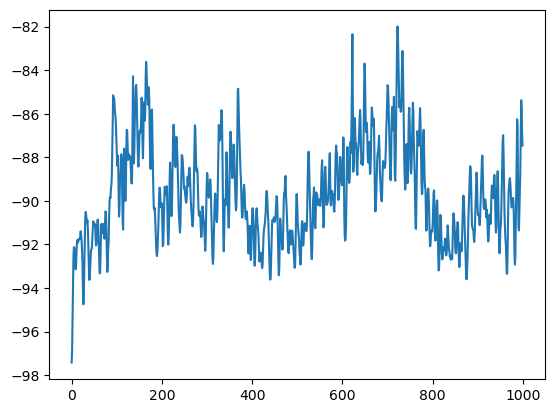

In [6]:
### First lets make a list of numbers that go from 0 to the length of energies. This is so that we can make a scatter
### plot of the energies for each structure at index x
x = np.arange(0, len(energies))
plt.plot(x, energies)

### This is so that the plot displays in the jupyter notebook. In actual python script, we would use plt.show()
%matplotlib inline  

### We have a thousand structures in our list, so the x-axis extends to 1000. Keep in mind that values on the y-axis are in eV (electron volts) <br> <br> Lets also plot the largest force vector on the atoms in the structure for each structure

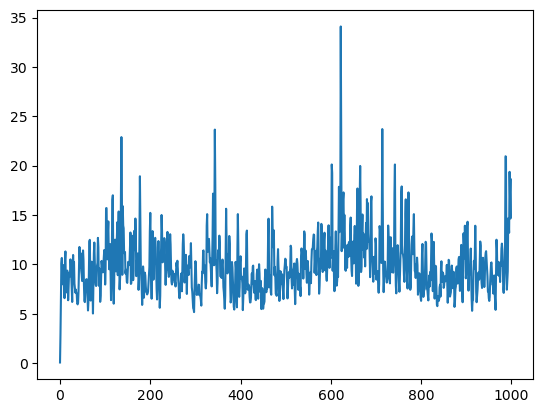

In [7]:
largest_force_magnitudes = []
for i in range(len(forces)):
    ### Here we save the magnitude of the force for each force on each atom in the unit cell
    force_magnitudes = []
    for j in range(len(forces[i])):
        ### We use the numpy library to calculate the length of the force on atom j, which is referred to as the magnitude
        force_magnitude = np.linalg.norm(forces[i][j])
        force_magnitudes.append(force_magnitude)

    ### Finally, we use the numpy library to find the largest force magnitude for this structure
    largest_force = np.amax(force_magnitudes)
    largest_force_magnitudes.append(largest_force)


### Next, we plot each force magnitude with respect to the index of the structure
x = np.arange(0, len(forces))
plt.plot(x, largest_force_magnitudes)

### We can see that for the early structures (the ones near x=0), even the largest force is quite small. However, the structures later on have a much larger force. This is because these results come from a molecular dynamics simulation, which means the atoms are moving around constantly and subsequently being pushed constantly.

### Now that we understand the format of the data, lets create a file that NEQUIP can read for training. <br>
### We will be making an extxyz file. This means that energies and forces will be written for each configuration of atoms. Lets do a simple test to verify it works

In [8]:
### Lets choose structure 11 to test on
teststructure = structures[10].copy()

### Here we import this "calculator" to simply store the values of energy and forces
from ase.calculators.singlepoint import SinglePointCalculator

### We define the "calc" of this structure to just be a function that returns either the energies or the forces
teststructure.calc = SinglePointCalculator(energy=energies[10], forces=forces[10], atoms=teststructure)

### Lets verify that the data was input correctly
print(teststructure.get_potential_energy(), "=",energies[10])
print("")
print(teststructure.get_forces(), "=", forces[10])

### Now we write out file to "test.extxyz". You can open this file to see that things have been properly written
from ase.io import write
write("test.extxyz", teststructure, format='extxyz')

-92.87576295593863 = -92.87576295593863

[[ 3.33797564  1.62464736 -3.84386113]
 [-3.6782352  -0.14456652 -1.00140032]
 [-2.09448968  2.85214464 -0.57546884]
 [ 1.98640845 -2.08304851 -0.90779581]
 [ 0.53734864 -0.38469393 -1.69818315]
 [ 1.66344134  2.51305205  2.59690119]
 [ 2.00028782 -1.18841462  1.89392922]
 [ 1.04344342  1.11123829  1.88026772]
 [ 0.18837934  0.51097662 -3.16485836]
 [-2.9094413  -4.04642925  1.61256092]
 [-2.95077166 -5.85190149  0.55686183]
 [ 0.87546735  5.08684284  2.65092949]] = [[ 3.33797564  1.62464736 -3.84386113]
 [-3.6782352  -0.14456652 -1.00140032]
 [-2.09448968  2.85214464 -0.57546884]
 [ 1.98640845 -2.08304851 -0.90779581]
 [ 0.53734864 -0.38469393 -1.69818315]
 [ 1.66344134  2.51305205  2.59690119]
 [ 2.00028782 -1.18841462  1.89392922]
 [ 1.04344342  1.11123829  1.88026772]
 [ 0.18837934  0.51097662 -3.16485836]
 [-2.9094413  -4.04642925  1.61256092]
 [-2.95077166 -5.85190149  0.55686183]
 [ 0.87546735  5.08684284  2.65092949]]


### Lets now print the file "test.extxyz" to make sure the energy and forces were written properly

In [9]:
with open("test.extxyz","r") as f:
    print(f.read())

12
Lattice="4.11427362168317 -0.0 0.0 -0.0 4.52931324091741 0.0 0.0 0.0 5.08213668220882" Properties=species:S:1:pos:R:3:forces:R:3 energy=-92.87576295593863 pbc="T T T"
O        0.93124927       4.18687216       3.29139399       3.33797564       1.62464736      -3.84386113
O        1.13533575       1.90503942       4.54970986      -3.67823520      -0.14456652      -1.00140032
O        3.13548544       2.44313150       3.00441673      -2.09448968       2.85214464      -0.57546884
O        2.99264230       0.38097914       4.67438489       1.98640845      -2.08304851      -0.90779581
O        2.96687506       0.34653430       2.08259701       0.53734864      -0.38469393      -1.69818315
O        3.08859044       2.50767127       0.34202930       1.66344134       2.51305205       2.59690119
O        1.05595407       1.98810120       1.86008787       2.00028782      -1.18841462       1.89392922
O        0.84910803       4.12291608       0.67747775       1.04344342       1.11123829       1

### Energy is written on line 2 and the forces are written next to the positions in columns 4, 5 and 6

### Now that we know its working, lets go ahead and split up our structure, energies and forces into a training set and a testing set. The training set will be used to train the model, and the testing set will be used to verify the model works properly.

In [10]:
np.set_printoptions(threshold=100)

### First lets make a list of the indicies from 0 to the number of structures we have
indicies = np.arange(0, len(structures))
print("Original index order:", indicies)

### Now lets shuffle these so that there is a random distribution of data in the training and testing sets
np.random.shuffle(indicies)
print("Shuffled index order:", indicies)

### Now lets define what percentage of the data we want in the training and testing sets. 
### Here, we choose that 90% of the data goes to the training set and 10% for the testing set
### This needs to be an integer, so we wrap it with the int() function
Num_train = int(0.9*len(structures))
Num_test = len(structures) - Num_train
print("")
print("Number of training points:", Num_train)
print("Number of testing points:", Num_test)

Original index order: [  0   1   2 ... 997 998 999]
Shuffled index order: [493  43 598 ... 786 877 575]

Number of training points: 900
Number of testing points: 100


In [11]:
### Now lets loop through all the structures and create a list of training structures
training_structures = []
for i in range(0, Num_train):
    ### This pulls one random structure from the structures list by selecting the ith element of indicies, which we shuffled before
    training_structure = structures[indicies[i]]
    training_structure.calc = SinglePointCalculator(energy=energies[indicies[i]], forces=forces[indicies[i]], atoms=training_structure)
    training_structures.append(training_structure)

### Lets make sure the list is the right length
print("")
print("Number of training structures:", len(training_structures))


Number of training structures: 900


In [18]:
### We can now do the same thing for the testing structures.
testing_structures = []

### We now have i go from Num_train (900) to Num_train+Num_test (900+100 = 1000) to put the rest of structures into the testing set
for i in range(Num_train, Num_train+Num_test):
    ### This pulls one random structure from the structures list by selecting the ith element of indicies, which we shuffled before
    testing_structure = structures[indicies[i]]
    testing_structure.calc = SinglePointCalculator(energy=energies[indicies[i]], forces=forces[indicies[i]], atoms=testing_structure)
    testing_structures.append(testing_structure)

### Lets make sure the list is the right length
print("")
print("Number of testing structures:", len(testing_structures))


Number of testing structures: 100


### Now that we have both the training and testing sets, lets write them to their respective extxyz files so that NEQUIP can read them 

In [19]:
from ase.io import write
write("train.extxyz", training_structures, format='extxyz')
write("test.extxyz", testing_structures, format='extxyz')

### Finally, it is time to run the training of the ML Potential. There is a configuration file included in the files called train.yaml which contains the training parameters.

In [1]:
### Here we print train.yaml out for convenience
with open("train.yaml","r") as f:
    print(f.read())

# a simple example config file

# Two folders will be used during the training: 'root'/process and 'root'/'run_name'
# run_name contains logfiles and saved models
# process contains processed data sets
# if 'root'/'run_name' exists, 'root'/'run_name'_'year'-'month'-'day'-'hour'-'min'-'s' will be used instead.
root: results/SiO_training
run_name: SiO-training-run
seed: 123                                                                         # model seed
dataset_seed: 456                                                                 # data set seed
default_dtype: float32
append: true                                                                      # set true if a restarted run should append to the previous log file
device: cpu

# see https://arxiv.org/abs/2304.10061 for discussion of numerical precision

# network
r_max: 4.0                                                                        # cutoff radius in length units, here Angstrom, this is an important hyperparamter to

### The important bits in this file are the dataset, dataset_file_name, chemical_symbols, n_train, n_val and max_epochs. <br>
#### -- For dataset, dataset_file_name, chemical_symbols, those will have to be changed if you want to do training on another dataset or different types of atoms. Here, we are training structures with Si and O, so we put those as the chemical symbols 
#### -- For n_train and n_val, this sets the split of training and validation. What this means is that out of our 900 training structures, we will actually train on 850 of them and then use the remaining 50 to make sure the model isn't overfitting. Overfitting means that the model has ONLY learned the training data and nothing else. If the model is overfitting, the error for the training set will go rapidly down, but the error for the validation set will start to increase. This is very bad and hence we must reserve some data for validation 
#### -- Now for max_epochs, this just sets how many loops over the training data we do. Every time we loop over the training data, the model learns a bit more and becomes a bit better. Here we set it to 5 for a quick demonstration but in reality you would want 50-100.

### Now lets run the training loop. This will take a few minutes so just sit back and wait. We print out "I am done" after it finishes.

In [ ]:
### Here we use "!" to run a command line argument. What this means is that the jupyter notebook runs this command like
### You entered it directly into your terminal

### IMPORTANT: This bit of code will remove the previous results. Please comment this out if you don't want that.
### If it says "rm: cannot remove 'results': No such file or directory", just ignore it. That means you haven't
### trained anything yet.
import os
os.system("rm -r results")
############################################################################################################

!nequip-train train.yaml
print("I am done")

/opt/anaconda3/lib/python3.12/site-packages/nequip/__init__.py:20: UserWarning: !! PyTorch version 2.3.1 found. Upstream issues in PyTorch versions 1.13.* and 2.* have been seen to cause unusual performance degredations on some CUDA systems that become worse over time; see https://github.com/mir-group/nequip/discussions/311. The best tested PyTorch version to use with CUDA devices is 1.11; while using other versions if you observe this problem, an unexpected lack of this problem, or other strange behavior, please post in the linked GitHub issue.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/nequip/scripts/train.py:180: UserWarning: default_dtype=float32 but we strongly recommend float64
  warnings.warn(
Torch device: cpu
Processing dataset...
Loaded data: Batch(atomic_numbers=[10800, 1], batch=[10800], cell=[900, 3, 3], edge_cell_shift=[335110, 3], edge_index=[2, 335110], forces=[10800, 3], pbc=[900, 3], pos=[10800, 3], ptr=[901], total_energy=[900, 1])
    processed dat

### Now lets deploy the model. What this means is that we will transform the model into something that can be used the the atomic simulation environment.

In [ ]:
import os
os.system("mkdir deployed_model")
!nequip-deploy build --train-dir results/SiO_training/SiO-training-run deployed_model/siomodel.pth

### This saves a version of the model to the folder 'deployed_model/siomodel.pth'. We can now use this model to do some testing with ASE

In [ ]:
### Lets first read the testing structures that we saved earlier
from ase.io import read
test_structures = read("test.extxyz", index=':', format='extxyz')


### Since we already saved the energies of these structures, we can simply run structure.get_potential_energy() 
### to get the energy that we saved 
### NOTE: At this stage we have not yet loaded in the ML Potential
print("DFT Energy of structure 11 is", test_structures[10].get_potential_energy(), "eV")



### Now lets see what the model predicts. For this, we can make a copy of the atoms object for structure 11 and assign the "calculator"
### to the ML Potential. This will override the previous "calculator" which just returned the previously calculated energies. 
### The NEQUIP model will instead fully recalculate the energies
from nequip.ase.nequip_calculator import nequip_calculator
test_structure = test_structures[10].copy()

## Note how we use the model we just saved
test_structure.calc = nequip_calculator("deployed_model/siomodel.pth")
print("ML Potential energy of structure 11 is", test_structure.get_potential_energy(), "eV")




### Lets now make a graph of the energies predicted by the ML algorithm and the true energies from DFT

In [ ]:
### This library just makes a progress bar so that we can see how long the for loop will take. Feel free to remove 
### it if you don't mind not having a progress bar
from tqdm import tqdm

### First, we make a list of the energies from DFT
dft_energies = []
for i in range(len(test_structures)):
    dft_energy = test_structures[i].get_potential_energy()
    dft_energies.append(dft_energy)

### Next, we make a list of energies calculated by the ML Potential
## For simplicity, we define the calculator in the beginning
ml_calc = nequip_calculator("deployed_model/siomodel.pth")
ml_energies = []
for i in tqdm(range(len(test_structures))):
    test_structure = test_structures[i].copy()
    test_structure.calc = ml_calc
    ml_energy = test_structure.get_potential_energy()
    ml_energies.append(ml_energy)

In [ ]:
### Now we can go ahead and plot the results
plt.scatter(dft_energies, ml_energies)
plt.xlabel("DFT Energy (eV)")
plt.ylabel("ML Energy (eV)")

### Lets also make a line that represents perfect agreement (that means the DFT energy exactly matches the ML Energy)
x = np.linspace(np.amin(dft_energies), np.amax(dft_energies), 100)
plt.plot(x, x, c='black', linestyle='--')


## We can see that the ML energy matches the DFT energy quite well. This is good and the results can be improved either by including more training data, or by increasing the number of epochs or making the model larger. 